
Model Coefficients:
total_rooms: -30.95
total_bedrooms: 163.66
median_income: 49042.91
Intercept: 10361.21

Mean Squared Error: 6730530616.56
R-squared Score: 0.51


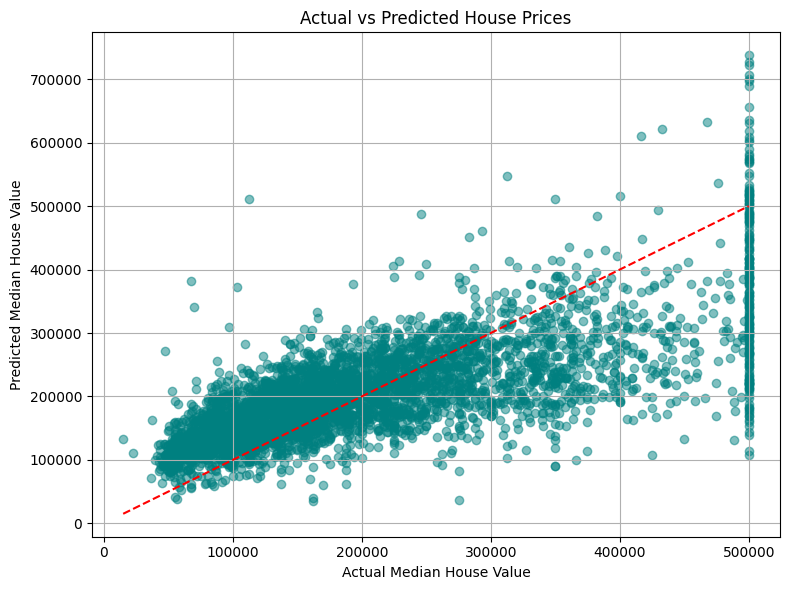

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('housing.csv') 

df.dropna(subset=['total_rooms', 'total_bedrooms', 'median_income', 'median_house_value'], inplace=True)

features = ['total_rooms', 'total_bedrooms', 'median_income']
target = 'median_house_value'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Coefficients:")
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()
